In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.shape

(7176, 4)

 rows and columns are in `gdp_df`? What are the data types of each column? 7176,4

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [9]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [10]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country','Year':'Year','Value':"GDP_Per_Capita"})

In [11]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

Gives the type of data in df

In [12]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [13]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


 How many countries have data for all years? 

In [14]:
#country_all_yr = gdp_df.Year.value_counts()
country_all_yr = gdp_df.Country.value_counts()
country_all_yr

Country
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: count, Length: 242, dtype: int64

Unique Years in the data frame.

In [15]:
country_all_yr = country_all_yr.reset_index(drop=True)
country_all_yr

0      31
1      31
2      31
3      31
4      31
       ..
237    13
238    10
239    10
240     8
241     8
Name: count, Length: 242, dtype: int64

 Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

missing_df = gdp_df.isnull()

In [16]:
#country_all_yr.loc[country_all_yr['Country'] == 31]
country_all_yr.query('count == 31')

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
country_notequal_yr=country_all_yr.query('count != 31')

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [40]:
country_all_yr_2020 = gdp_df.Year.value_counts()

In [41]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [42]:
year_data_2020 = gdp_df.query('Year == 2020')
year_data_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


histogram

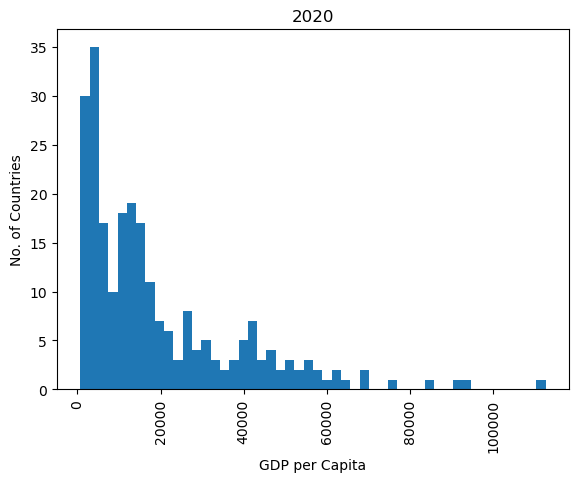

In [43]:
ax = year_data_2020.hist('GDP_Per_Capita', 'Year', bins=50)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('No. of Countries')
plt.show()


a density plot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

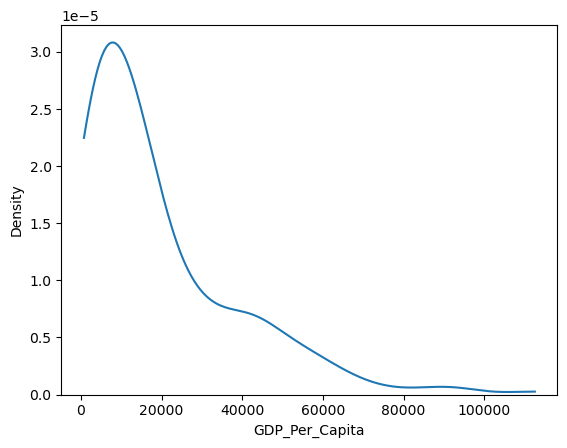

In [44]:
import seaborn as sns
sns.kdeplot(year_data_2020['GDP_Per_Capita'], warn_singular=False, cut=0)



a boxplot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GDP_Per_Capita'>

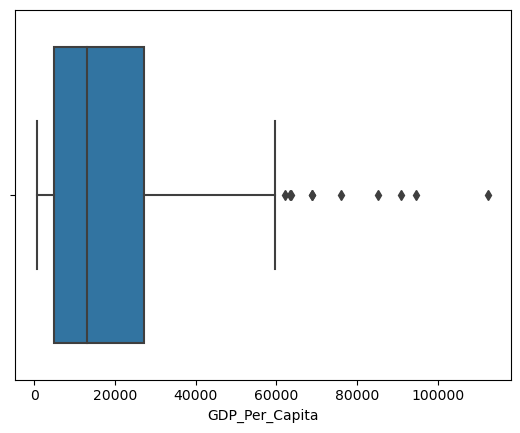

In [45]:
sns.boxplot(x=year_data_2020['GDP_Per_Capita'])

 and a violin plot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


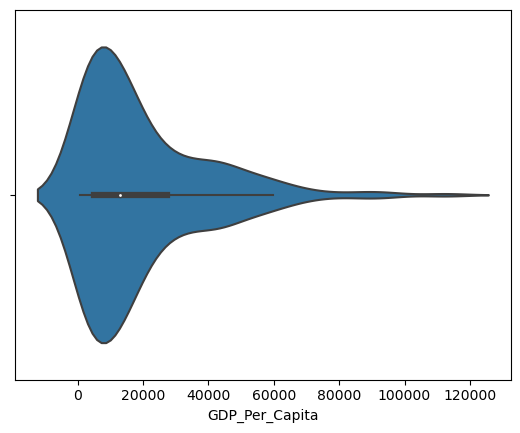

In [46]:
violinplot_1 = sns.violinplot(x='GDP_Per_Capita', data =year_data_2020 )

What was the median GDP per capita value in 2020?

In [47]:
import numpy as np

year_data_2020


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [49]:
#filtering year 2020
GDP_2020 = year_data_2020['GDP_Per_Capita']

In [50]:
#GDP for year 2020
GDP_2020.median()

12908.9374056206

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

    * A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [51]:
# Filtered  years 1990, 2000, 2010, and 2020 data 

gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


A boxplot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

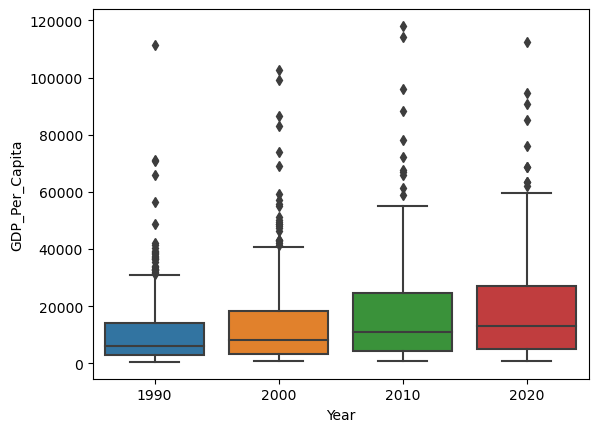

In [52]:
sns.boxplot (x= 'Year', y='GDP_Per_Capita', data = gdp_decades )

A barplot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


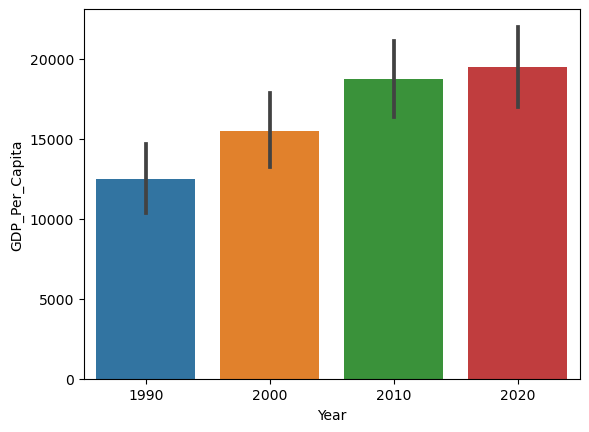

In [53]:
sns.barplot(x= 'Year', y='GDP_Per_Capita', data = gdp_decades )
plt.show()

scatterplot

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

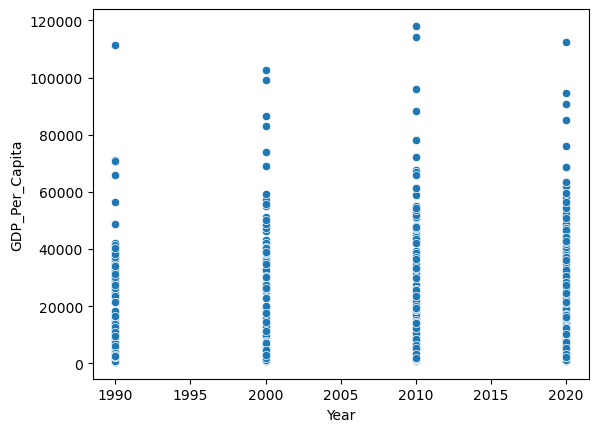

In [54]:
sns.scatterplot(data = gdp_decades,x ='Year',y = 'GDP_Per_Capita')

A scatterplot with a trend line overlaid

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

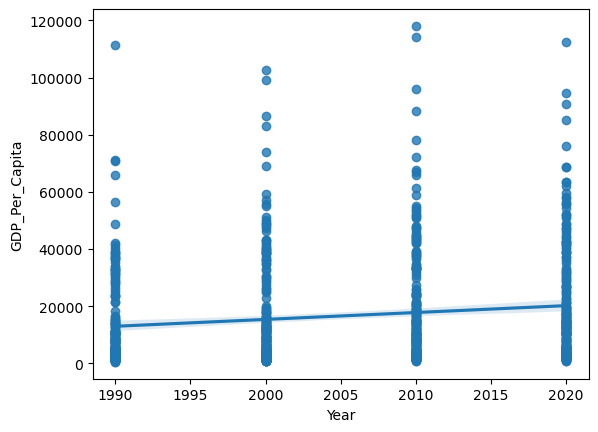

In [55]:
sns.regplot(x ='Year',y = 'GDP_Per_Capita',data = gdp_decades)

Which country was the first to have a GDP per capita greater than $100,000?

In [56]:
# filtering GDP gr8 than 10K and sorting by country to see which is the 1st country 
gdp_df
#gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
#countries_with_GDP_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
#countries_with_GDP_100k.sort_values(by = 'Year').head(1)


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [57]:
# Which country had the highest GDP per capita in 2020? 
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
gdp_df_2020_max = gdp_df_2020['GDP_Per_Capita'].max()
country_hvg_max_GDP = gdp_df_2020.query('GDP_Per_Capita == @gdp_df_2020_max')['Country'].to_string()
country_hvg_max_GDP = country_hvg_max_GDP[country_hvg_max_GDP.index(' '):].strip()
country_hvg_max_GDP

'Luxembourg'

Text(0.5, 0, 'Year')

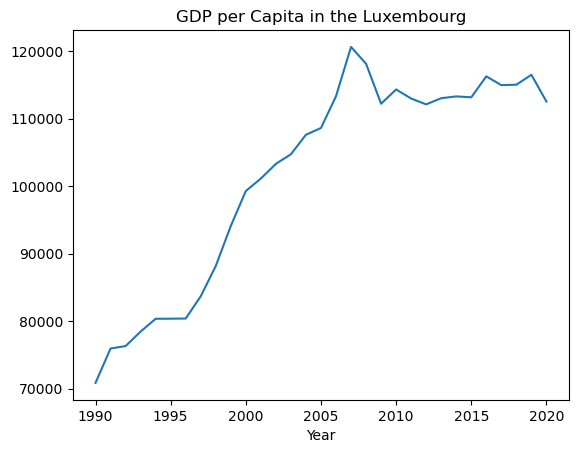

In [58]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

gdp_df_Lux = gdp_df[gdp_df['Country'] == country_hvg_max_GDP]
gdp_df_Lux
plt.plot(gdp_df_Lux['Year'], gdp_df_Lux['GDP_Per_Capita'])

plt.title('GDP per Capita in the ' + country_hvg_max_GDP)
plt.xlabel('Year')


In [59]:
# Which country had the lowest GDP per capita in 2020? 
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
gdp_df_2020_min = gdp_df_2020['GDP_Per_Capita'].min()
country_hvg_min_GDP = gdp_df_2020.query('GDP_Per_Capita == @gdp_df_2020_min')['Country'].to_string()
country_hvg_min_GDP = country_hvg_min_GDP[country_hvg_min_GDP.index(' '):].strip()
country_hvg_min_GDP

'Burundi'

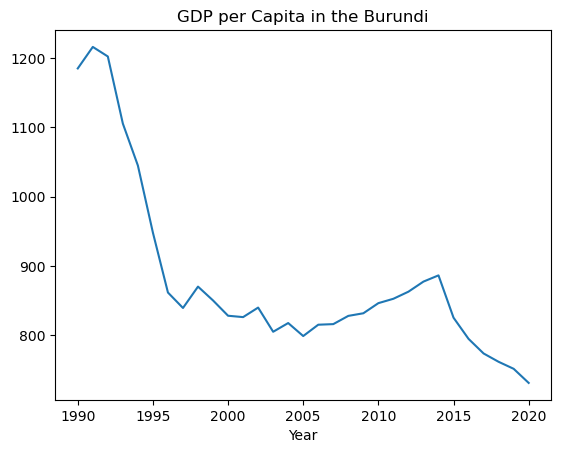

In [60]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
gdp_df_Bur = gdp_df[gdp_df['Country'] == country_hvg_min_GDP]
plt.plot(gdp_df_Bur['Year'],gdp_df_Bur['GDP_Per_Capita'])
plt.title('GDP per Capita in the ' + country_hvg_min_GDP)
plt.xlabel('Year')
plt.show()

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [61]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [20]:
internet_df.reindex()
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [69]:
internet_df = internet_df.drop('Value Footnotes', axis =1)

In [70]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [71]:
#rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df = internet_df.rename(columns={'Country or Area': 'Country','Year':'Year','Value':"Internet_Users_Pct"})

In [72]:
internet_df.shape

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


Look at the number of observations in this dataset per year. What do you notice?  over the time the internet usage has increaded.

In [74]:
#What is the first year to have a non-zero internet users percentage value?
non_zero_internet_users = internet_df['Internet_Users_Pct'] >0

internet_df.loc[internet_df['Internet_Users_Pct']>0]['Year'].min()

1990

In [75]:
non_zero_internet_users

0        True
1        True
2        True
3        True
4        True
        ...  
4490     True
4491     True
4492     True
4493     True
4494    False
Name: Internet_Users_Pct, Length: 4495, dtype: bool

In [76]:
# What is the first year to have a non-zero internet users percentage value?
sorted_series = internet_df.sort_values('Year')
sorted_series.head(1)

,Country,Year,Internet_Users_Pct
1663,Grenada,1960,0.0


C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

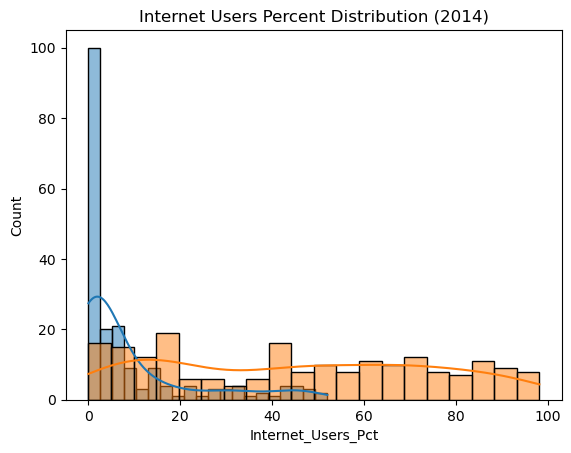

In [28]:
# How does the distribution of internet users percent differ for 2000 and 2014?
internet_2000_and_2014 = internet_df.loc[(internet_df['Year'] == 2000) | (internet_df['Year'] == 2014)]
internet_2000_and_2014

# Create a histogram for the internet users percent in 2000 and 2014
sns.histplot(internet_2000_and_2014[internet_2000_and_2014['Year'] == 2000]['Internet_Users_Pct'], bins=20, kde=True)
plt.title('Internet Users Percent Distribution (2000)')
sns.histplot(internet_2000_and_2014[internet_2000_and_2014['Year'] == 2014]['Internet_Users_Pct'], bins=20, kde=True)
plt.title('Internet Users Percent Distribution (2014)')
plt.show()

In [78]:
## For how many countries was the percentage of internet users below 5% in 2014?  
below_5_2014=internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct<5)]
below_5_2014


,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


#Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each 
of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last 
few rows to confirm that it merged correctly.

In [86]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               left_on = 'Country', right_on = 'Country', 
                               how = 'inner')
#gdp_and_internet_use.head(3)
gdp_and_internet_use

,Country,Year_x,GDP_Per_Capita,Year_y,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,2014,6.390000
1,Afghanistan,2020,1970.560169,2013,5.900000
2,Afghanistan,2020,1970.560169,2012,5.454545
3,Afghanistan,2020,1970.560169,2011,5.000000
4,Afghanistan,2020,1970.560169,2010,4.000000
...,...,...,...,...,...
108530,Zimbabwe,1990,2652.129209,1997,0.033080
108531,Zimbabwe,1990,2652.129209,1996,0.016790
108532,Zimbabwe,1990,2652.129209,1995,0.007684
108533,Zimbabwe,1990,2652.129209,1994,0.001739


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [87]:
highest_internet_users = internet_df.loc[(internet_df.Year == 2014)]
highest_internet_users_sort = highest_internet_users.sort_values('Internet_Users_Pct', ascending=False)
highest_internet_users_sort.head(3)

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30


In [33]:
#Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

gdp_and_internet_use_2014 = internet_df.loc[(internet_df.Year == 2014)]
gdp_and_internet_use_2014.to_csv('gdp_and_internet_use_2014.csv', index=False)

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 
What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
internet_df